In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [9]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data Pre-Processing

In [11]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## Handling missing values

In [12]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [13]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [14]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [15]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

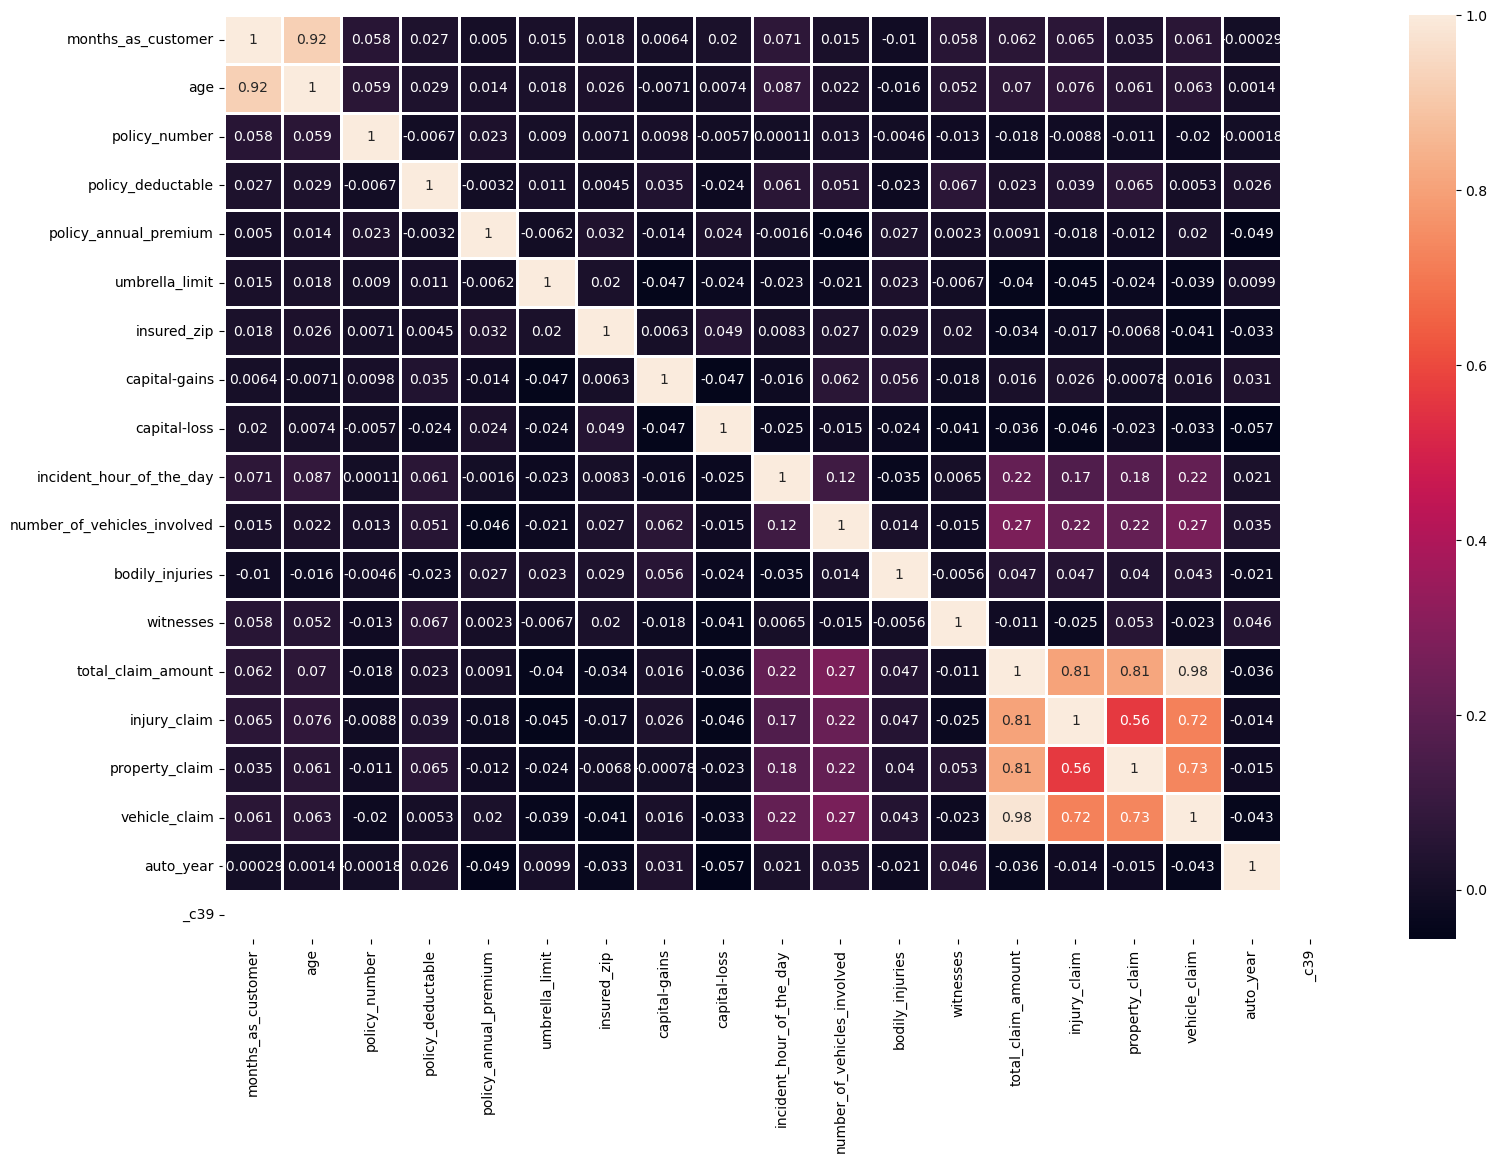

In [16]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [17]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [18]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [19]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


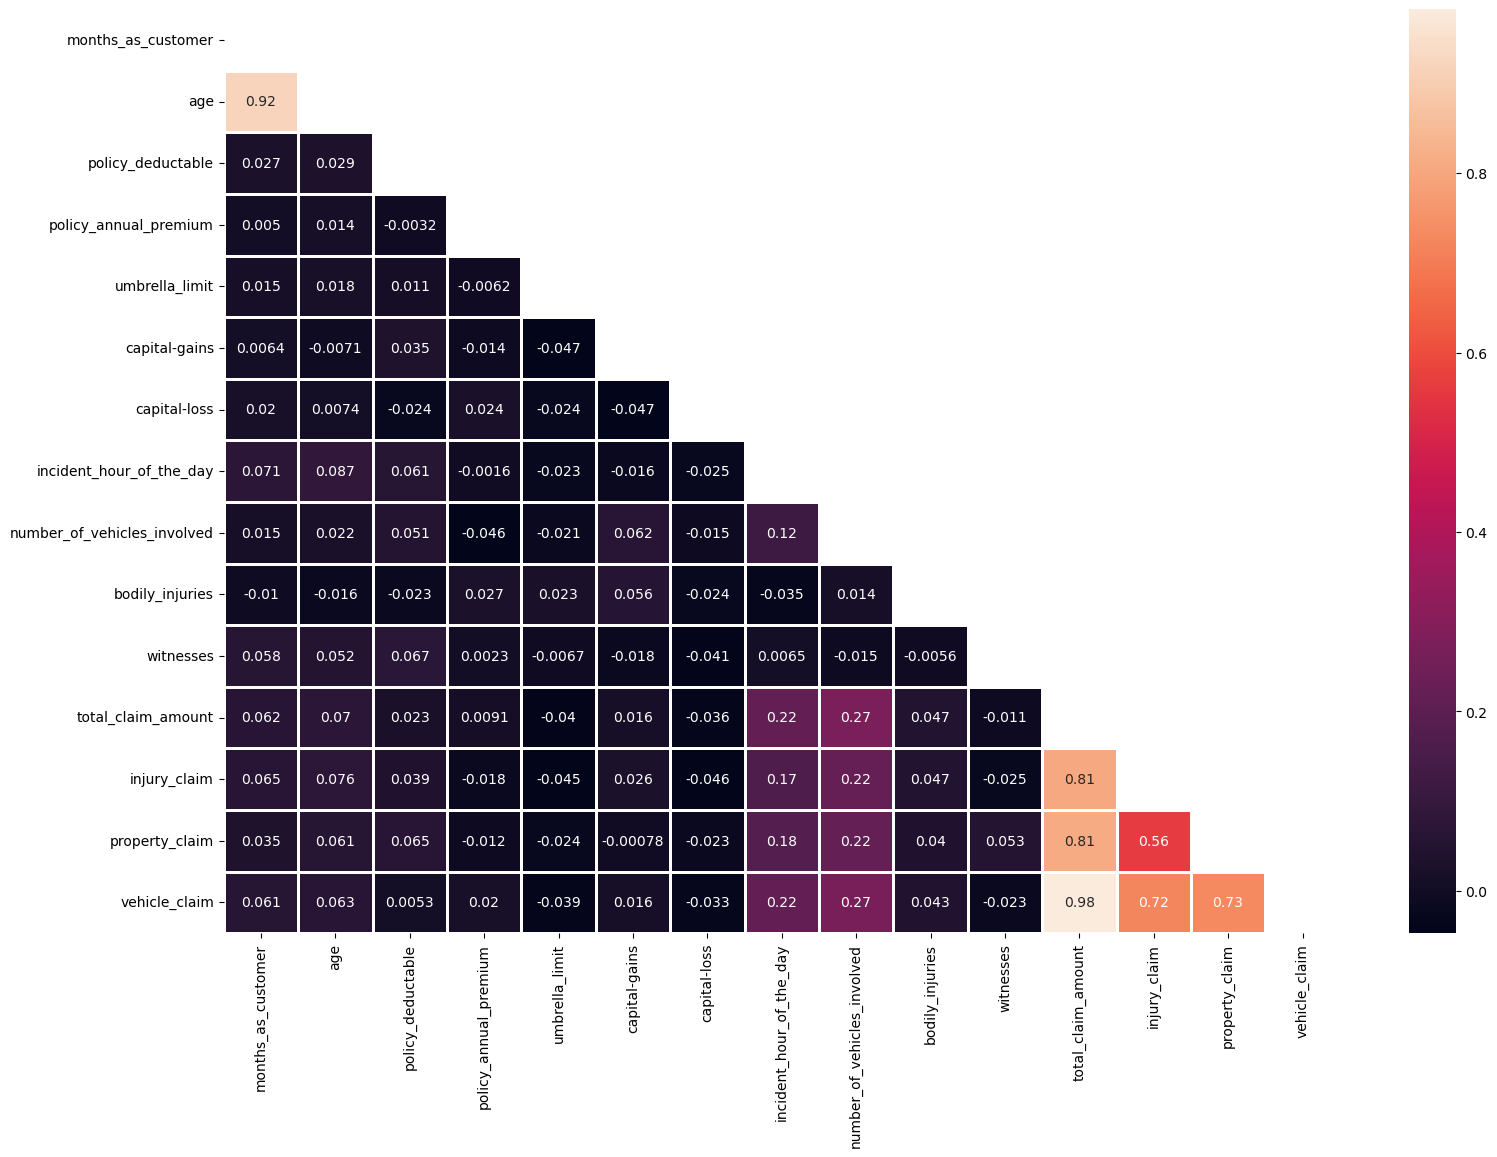

In [20]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [21]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [22]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

### Encoding Categorical columns

In [23]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [24]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [25]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [26]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [27]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [28]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [29]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [30]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [31]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


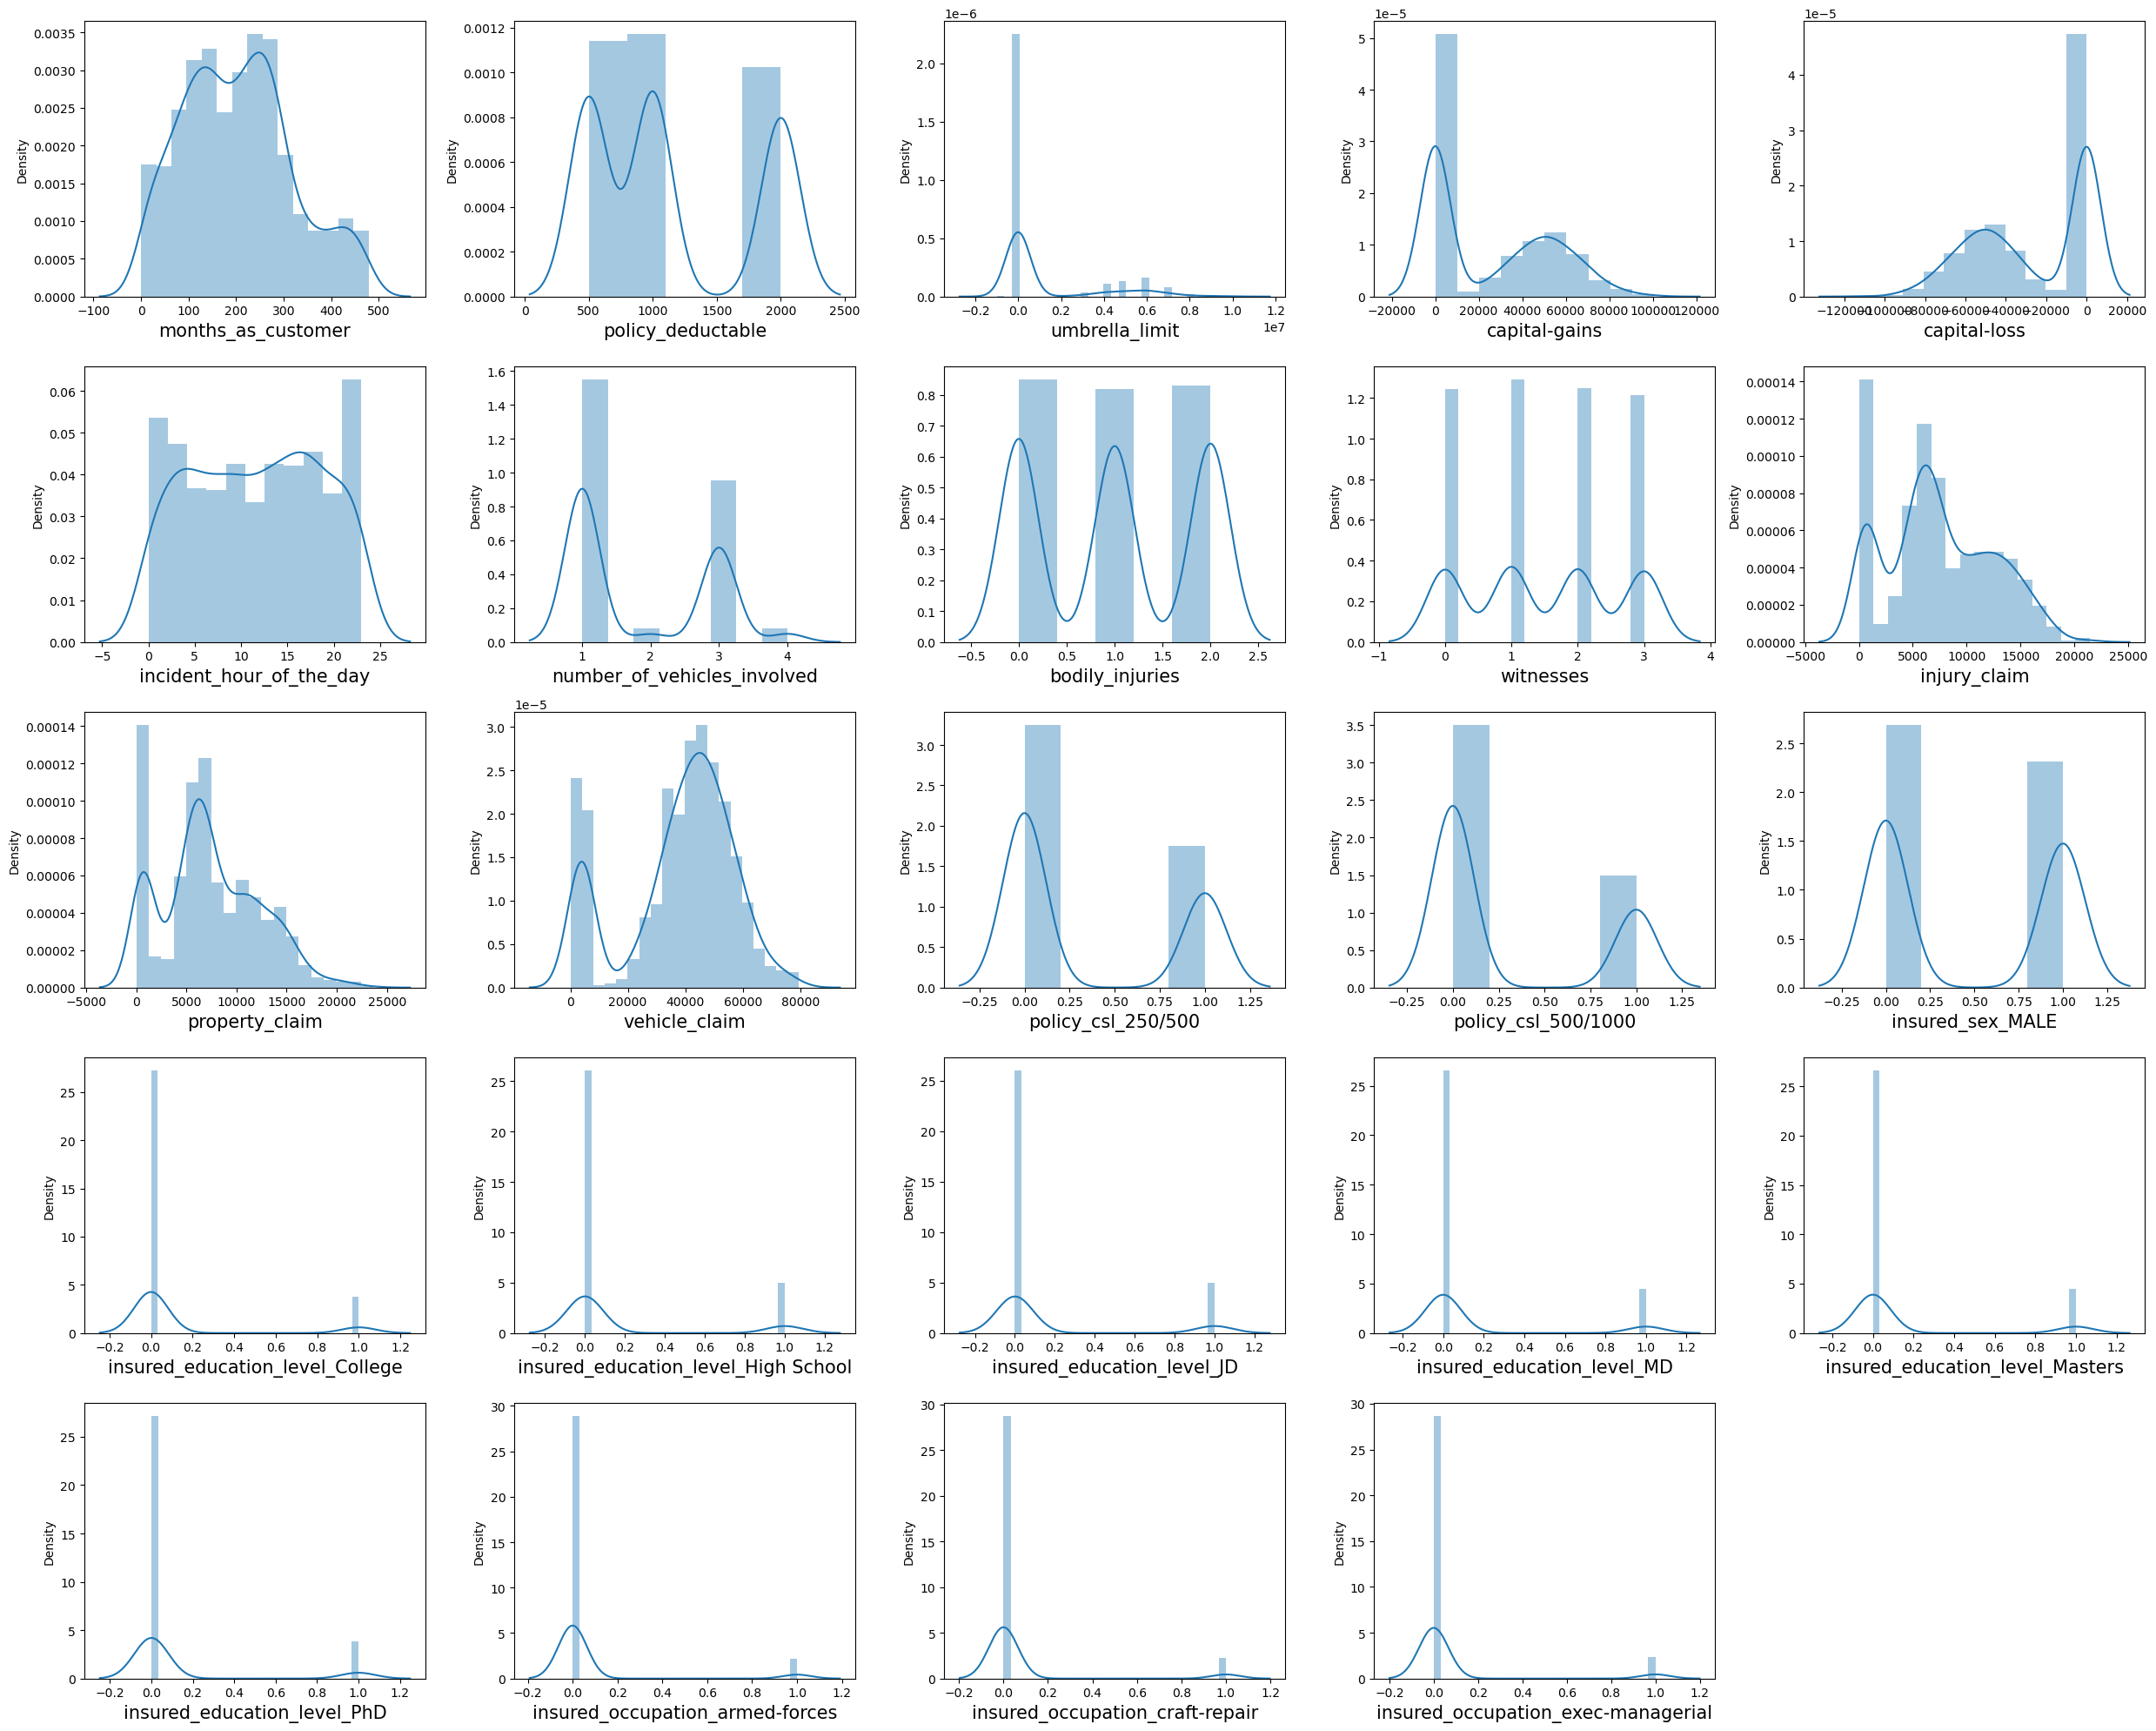

In [32]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Data looks good, let's check for outliers.

## Outliers Detection

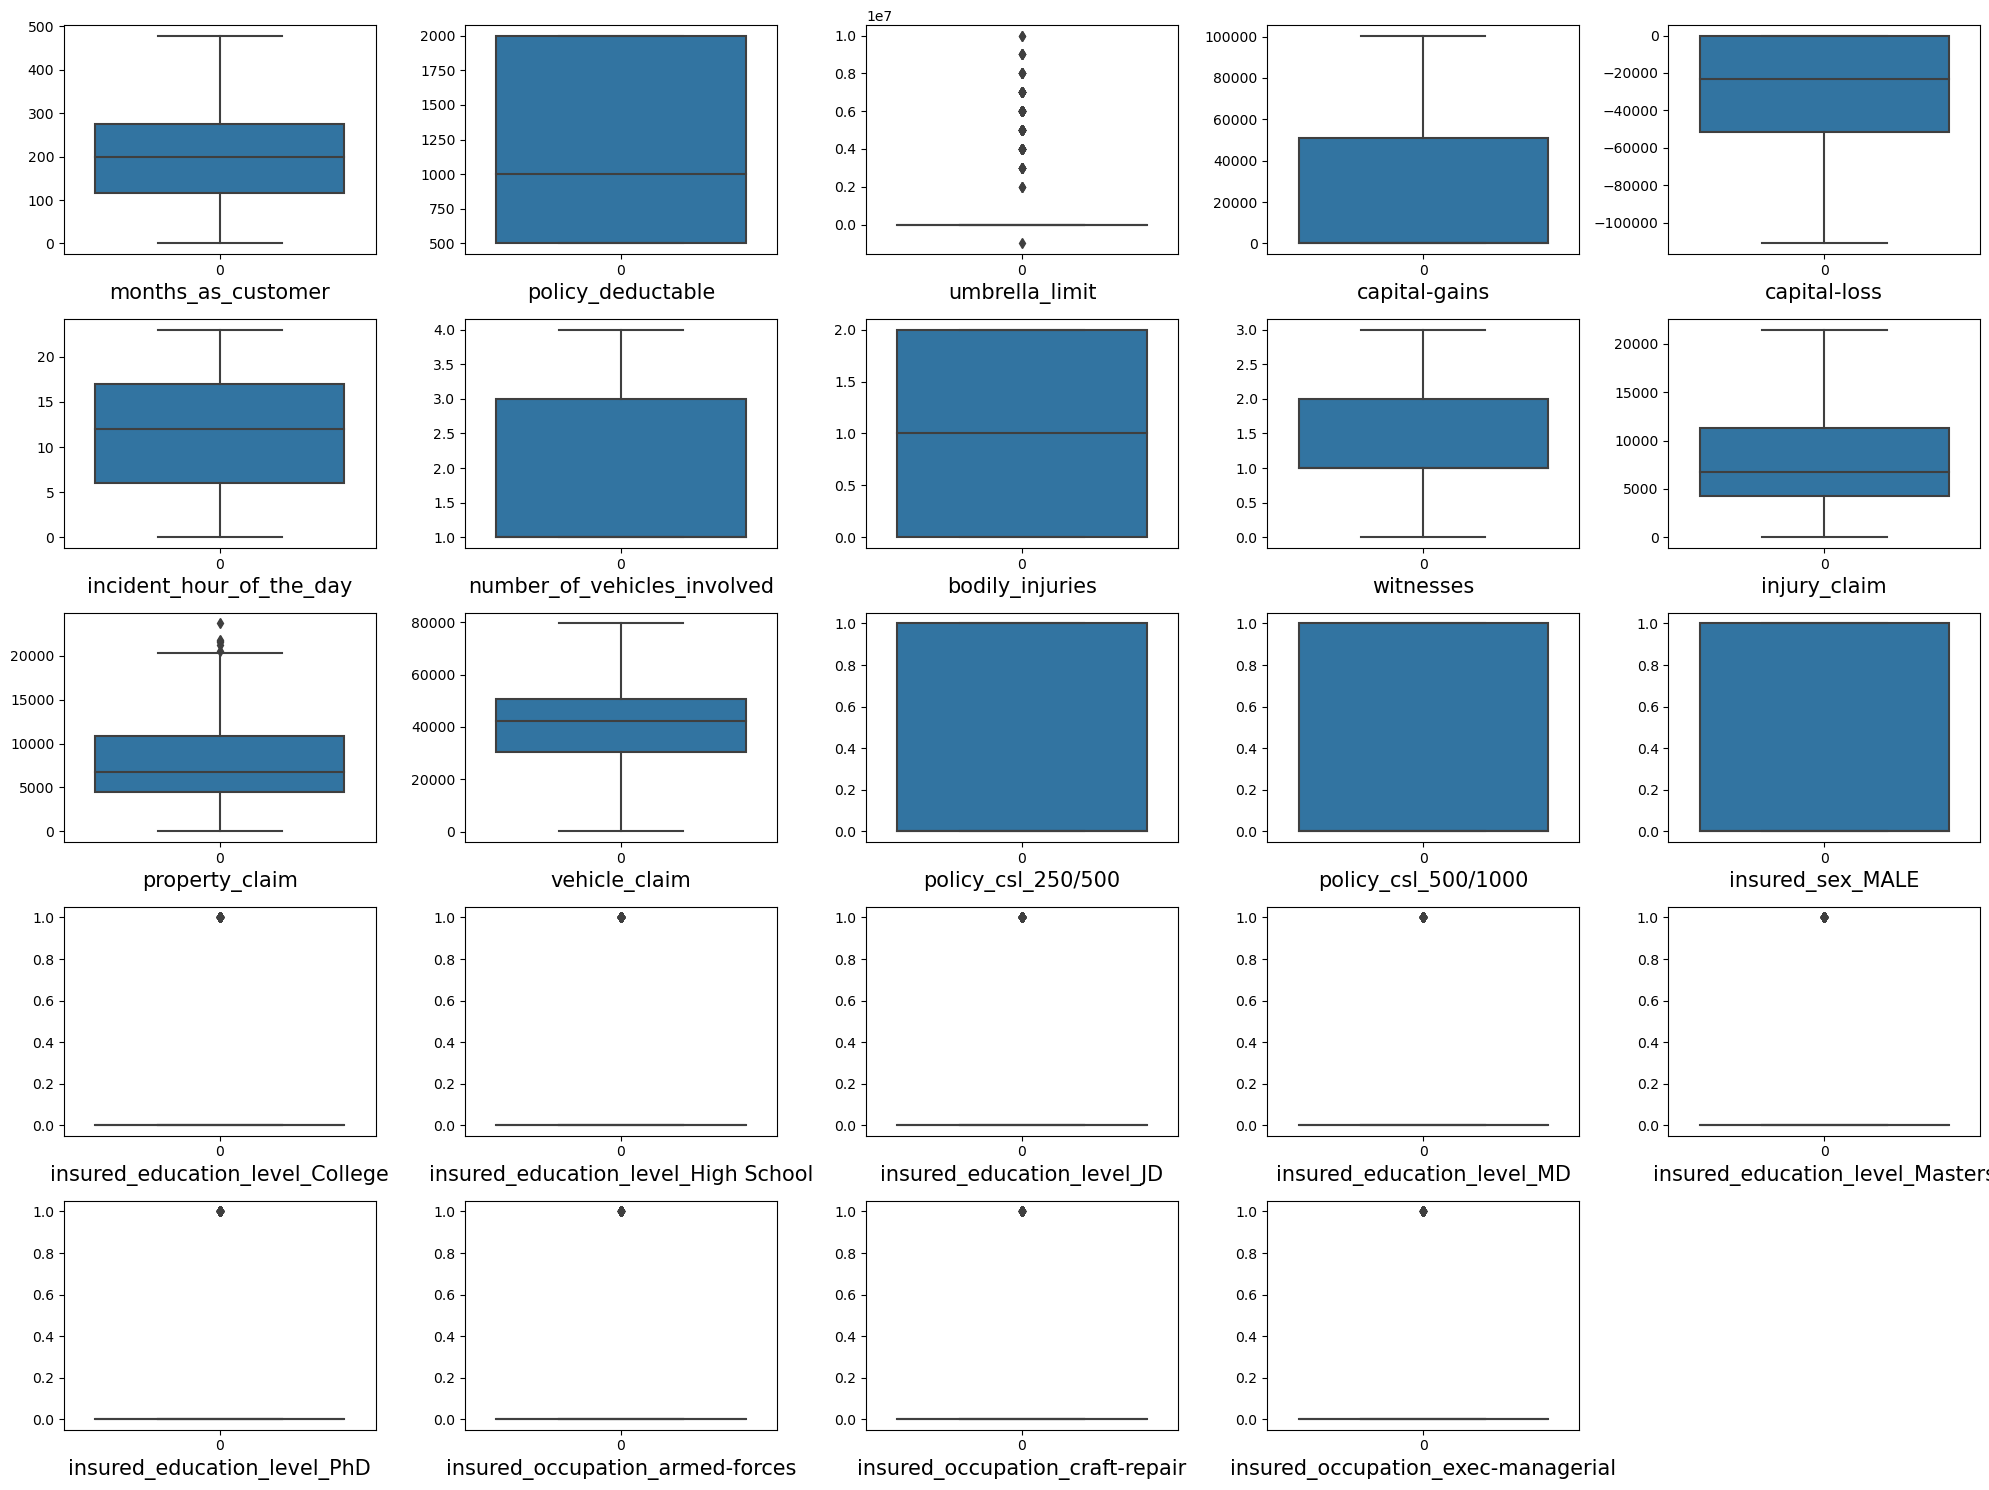

In [34]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later.

In [35]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
810,259,2000,0,0,-58300,3,3,0,2,6340,...,1,0,1,0,0,0,1,0,0,1
644,254,500,5000000,0,-74400,23,1,2,2,9720,...,0,1,0,0,0,0,1,0,0,0
542,93,2000,0,0,0,21,3,1,3,8740,...,0,0,0,0,0,0,0,1,1,0
746,255,500,0,38200,0,17,3,0,3,2930,...,1,0,1,0,1,0,0,0,1,0
884,280,1000,0,0,-72000,16,1,2,2,10220,...,0,1,0,0,1,0,0,0,0,0


In [37]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [38]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [39]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
810,0.499462,1.450826,-0.48856,-0.931195,-1.133353,-1.256961,1.105202,-1.180171,0.492619,-0.223617,-0.240829,0.318752
644,0.456108,-1.031576,1.66432,-0.931195,-1.706955,1.601934,-0.845154,1.251500,0.492619,0.483555,-0.554159,0.022600
542,-0.939894,1.450826,-0.48856,-0.931195,0.943729,1.316045,1.105202,0.035665,1.400393,0.278517,0.267273,-0.423781
746,0.464779,-1.031576,-0.48856,0.435439,0.943729,0.744266,1.105202,-1.180171,1.400393,-0.937065,-0.342449,-0.966546
884,0.681550,-0.204109,-0.48856,-0.931195,-1.621449,0.601321,-0.845154,1.251500,0.492619,0.588166,0.580602,0.130292


In [40]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [41]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [42]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
810,0.499462,1.450826,-0.48856,-0.931195,-1.133353,-1.256961,1.105202,-1.180171,0.492619,-0.223617,...,1,0,1,0,0,0,1,0,0,1
644,0.456108,-1.031576,1.66432,-0.931195,-1.706955,1.601934,-0.845154,1.251500,0.492619,0.483555,...,0,1,0,0,0,0,1,0,0,0
542,-0.939894,1.450826,-0.48856,-0.931195,0.943729,1.316045,1.105202,0.035665,1.400393,0.278517,...,0,0,0,0,0,0,0,1,1,0
746,0.464779,-1.031576,-0.48856,0.435439,0.943729,0.744266,1.105202,-1.180171,1.400393,-0.937065,...,1,0,1,0,1,0,0,0,1,0
884,0.681550,-0.204109,-0.48856,-0.931195,-1.621449,0.601321,-0.845154,1.251500,0.492619,0.588166,...,0,1,0,0,1,0,0,0,0,0


# Models

### Suport Vector Classifier

In [43]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [44]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.848
Test accuracy of Support Vector Classifier is : 0.76
[[190   0]
 [ 60   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       190
           Y       0.00      0.00      0.00        60

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.66       250



### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [46]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7493333333333333
Test accuracy of KNN is : 0.76
[[190   0]
 [ 60   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       190
           Y       0.00      0.00      0.00        60

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.66       250



### Decision Tree Classifier



In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


In [48]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.432
[[91 99]
 [43 17]]
              precision    recall  f1-score   support

           N       0.68      0.48      0.56       190
           Y       0.15      0.28      0.19        60

    accuracy                           0.43       250
   macro avg       0.41      0.38      0.38       250
weighted avg       0.55      0.43      0.47       250



### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)


In [52]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.716
[[138  52]
 [ 19  41]]
              precision    recall  f1-score   support

           N       0.88      0.73      0.80       190
           Y       0.44      0.68      0.54        60

    accuracy                           0.72       250
   macro avg       0.66      0.70      0.67       250
weighted avg       0.77      0.72      0.73       250



### Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [54]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of GradientBoosting is : {gb_train_acc}")
print(f"Test accuracy of GradientBoosting is : {gb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of GradientBoosting is : 0.9386666666666666
Test accuracy of GradientBoosting is : 0.436
[[ 71 119]
 [ 22  38]]
              precision    recall  f1-score   support

           N       0.76      0.37      0.50       190
           Y       0.24      0.63      0.35        60

    accuracy                           0.44       250
   macro avg       0.50      0.50      0.43       250
weighted avg       0.64      0.44      0.47       250



### Extra Trees Classifier

In [55]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)

In [56]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

etc_train_acc = accuracy_score(y_train, etc.predict(X_train))
etc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of ExtraTreesClassifier is : {etc_train_acc}")
print(f"Test accuracy of ExtraTreesClassifier is : {etc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of ExtraTreesClassifier is : 1.0
Test accuracy of ExtraTreesClassifier is : 0.828
[[178  12]
 [ 31  29]]
              precision    recall  f1-score   support

           N       0.85      0.94      0.89       190
           Y       0.71      0.48      0.57        60

    accuracy                           0.83       250
   macro avg       0.78      0.71      0.73       250
weighted avg       0.82      0.83      0.82       250



As per above result we can see our ‘ExtraTreesClassifier’ model is best for our prediction

## HyperParameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Create an instance of ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [58]:
best_model = grid_search.best_estimator_

In [60]:
pred = best_model.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 83.60%


### Saving the model

In [62]:
#saving the model using .pkl
import joblib
joblib.dump(best_model,"Insurance Claim Fraud Detection_model.pkl")

['Insurance Claim Fraud Detection_model.pkl']